In [1]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt

In [2]:
#connecting the notebook to database
connection = mysql.connector.connect(host="127.0.0.1",
                                     port="3306", 
                                     user="root",
                                     passwd="Kamo@12345",
                                    database = "who_covid_data")
#making a cursor

cursor = connection.cursor()
print(connection)

In [ ]:
#creates the database to hold the data 

cursor.execute("CREATE DATABASE WHO_covid_Data")


In [ ]:
#creation of the table to hold the data and it's sub tables from the original data
cursor.execute("CREATE TABLE covid19_results (id INT AUTO_INCREMENT PRIMARY KEY,OBJECTID int(20),ISO_CODE varchar(800),COUNTRY_NAME varchar(800),Date_epicrv varchar(800),NewCase int(20),TotalCase int(20),NewDeath int(20),TotalDeath int(20))")

cursor.execute("CREATE TABLE Afghanistan (id INT AUTO_INCREMENT PRIMARY KEY,OBJECTID int(20),ISO_CODE varchar(800),COUNTRY_NAME varchar(800),Date_epicrv varchar(800),NewCase int(20),TotalCase int(20),NewDeath int(20),TotalDeath int(20)) SELECT * FROM covid19_results WHERE COUNTRY_NAME = 'Afghanistan' ")

cursor.execute("CREATE TABLE Brazil (id INT AUTO_INCREMENT PRIMARY KEY,OBJECTID int(20),ISO_CODE varchar(800),COUNTRY_NAME varchar(800),Date_epicrv varchar(800),NewCase int(20),TotalCase int(20),NewDeath int(20),TotalDeath int(20)) SELECT * FROM covid19_results WHERE COUNTRY_NAME = 'Brazil' ")

cursor.execute("CREATE TABLE Canada (id INT AUTO_INCREMENT PRIMARY KEY,OBJECTID int(20),ISO_CODE varchar(800),COUNTRY_NAME varchar(800),Date_epicrv varchar(800),NewCase int(20),TotalCase int(20),NewDeath int(20),TotalDeath int(20)) SELECT * FROM covid19_results WHERE COUNTRY_NAME = 'Canada' ")

In [ ]:
cursor.execute("SHOW TABLES")

for x in cursor:
    print(x)

In [ ]:
#Writing the first table into a csv file
cursor.execute("SELECT * FROM covid19_results WHERE COUNTRY_NAME ='Afghanistan' ")
allrows=cursor.fetchall() 

connection.close() 

dfA=pd.DataFrame(list(allrows),columns=['id','OBJECTID','ISO_CODE','COUNTRY_NAME','Date_epicrv','NewCase','TotalCase','NewDeath','TotalDeath'])
df.tocsv("Afghanistan_Covid19_Data.csv")

In [ ]:
#Writing the second table into a csv file
cursor.execute("SELECT * FROM covid19_results WHERE COUNTRY_NAME ='Brazil' ")
allrows=cursor.fetchall() 

connection.close() 

dfA=pd.DataFrame(list(allrows),columns=['id','OBJECTID','ISO_CODE','COUNTRY_NAME','Date_epicrv','NewCase','TotalCase','NewDeath','TotalDeath'])
df.tocsv("Brazil_Covid19_Data.csv")

In [ ]:
#Writing the third table into a csv file
cursor.execute("SELECT * FROM covid19_results WHERE COUNTRY_NAME ='Canada' ")
allrows=cursor.fetchall() 

connection.close() 

dfA=pd.DataFrame(list(allrows),columns=['id','OBJECTID','ISO_CODE','COUNTRY_NAME','Date_epicrv','NewCase','TotalCase','NewDeath','TotalDeath'])
df.tocsv("Canada_Covid19_Data.csv")

In [3]:
#conversion of data to a data frame
df = pd.read_csv('Data_ WHO Coronavirus Covid-19 Cases and Deaths - WHO-COVID-19-global-data.csv', delimiter = ',', nrows = 1000)
                   
df

,OBJECTID,ISO_CODE,COUNTRY_NAME,Date_epicrv,NewCase,TotalCase,NewDeath,TotalDeath
0,1,AFG,Afghanistan,2020-02-24T00:00:00.000Z,1,1,0,0
1,2,AFG,Afghanistan,2020-02-25T00:00:00.000Z,0,1,0,0
2,3,AFG,Afghanistan,2020-02-26T00:00:00.000Z,0,1,0,0
3,4,AFG,Afghanistan,2020-02-27T00:00:00.000Z,0,1,0,0
4,5,AFG,Afghanistan,2020-02-28T00:00:00.000Z,0,1,0,0
...,...,...,...,...,...,...,...,...
995,996,BLZ,Belize,2020-03-30T00:00:00.000Z,0,2,0,0
996,997,BLZ,Belize,2020-03-31T00:00:00.000Z,1,3,0,0
997,998,BLZ,Belize,2020-04-01T00:00:00.000Z,0,3,0,0
998,999,BLZ,Belize,2020-04-02T00:00:00.000Z,0,3,0,0


Text(0, 0.5, 'Country')

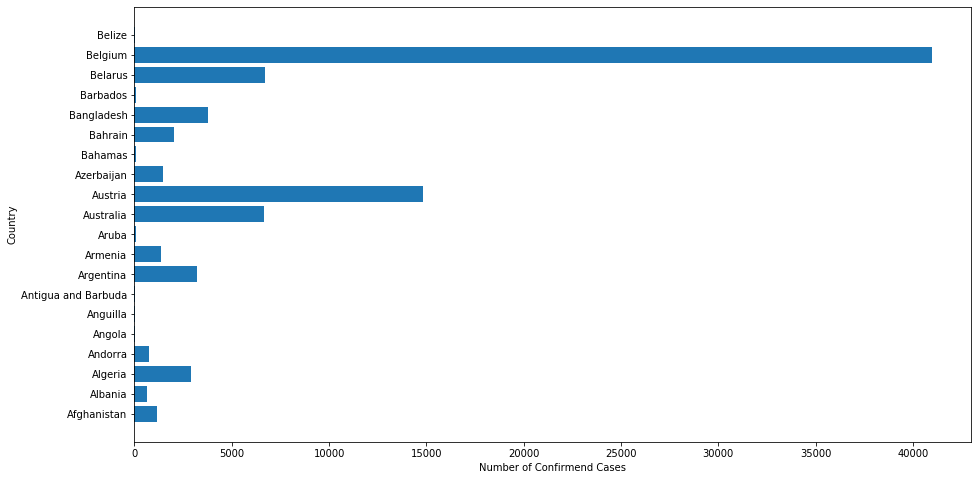

In [4]:
#plotting the overall cases for the each country.
fig, graph = plt.subplots(figsize=(15, 8))

graph.barh(df['COUNTRY_NAME'], df['TotalCase'])

plt.xlabel('Number of Confirmend Cases')
plt.ylabel('Country')




In [ ]:
#Plotting the data for the country Afghanistan and it's toal deaths over time.
df = pd.read_csv('Afghanistan_Covid19_Data.csv', delimiter = ',', nrows = 1000)


fig, graph1 = plt.subplots(figsize=(15,8))
graph1.scatter(df['Date_epicrv'], df['TotalDeath'])
graph1.set_title('Deaths according to date in Afghanistan')

plt.xticks(df['Date_epicrv'][::12])
plt.xlabel("Date and Time")
plt.ylabel("Total Death")